# Distribuições

Pmf = Probability mass function, a vantagem de caclular assim é que ele é bem mais escalavel que os casos anteriores.

Distribuições: Um conjunto de outcomes e sua probabilidade de ocorrer.



In [3]:
from empiricaldist  import Pmf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#### Criando um Pmf de um flip de moeda na mão

In [2]:
coin = Pmf()
coin['heads'] = 0.5
coin['tails'] = 1/2
coin

,probs
heads,0.5
tails,0.5


#### Criando um Pmf de um dado de 6 lados e depois de 20

In [33]:
d6 = Pmf.from_seq([1,2,3,4,5,6])
d6

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [34]:
#A chance de acertar no Eldrith normal
d6([5,6]).sum()

0.3333333333333333

In [35]:
#A chance de acertar sendo abençoado
d6([4,5,6]).sum()

0.5

In [36]:
d20 = Pmf.from_seq(range(1,21))
d20

,probs
1,0.05
2,0.05
3,0.05
4,0.05
5,0.05
6,0.05
7,0.05
8,0.05
9,0.05
10,0.05


##### Qual a chance de rolar um 20?

In [37]:
d20[20]

0.05

#### Criando um Pmf de uma string

In [38]:
letters = Pmf.from_seq(list('Mississippi'))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


#### Qual é a probabilidade de a letra ser i?

In [39]:
letters['i'] 

0.36363636363636365

In [40]:
letters.idxmax()

'i'

#### Convertendo para um dataframe e ordenando por probabilidade

In [41]:
pd.DataFrame(letters.values, index=letters.index, columns=['probs']).sort_values('probs', ascending=False)

,probs
i,0.363636
s,0.363636
p,0.181818
M,0.090909


### Cookie problem
Suppose there are two bowls of cookies.

* Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies.

* Bowl 2 contains 20 vanilla cookies and 20 chocolate cookies.

Now suppose you choose one of the bowls at random and, without looking, choose a cookie at random. If the cookie is vanilla, what is the probability that it came from Bowl 1?

In [42]:
likelihood_vannilla = [0.75, 0.5]
likelihood_chocolate = list(1 - np.array(likelihood_vannilla))

prior = Pmf.from_seq(['Bowl_1','Bowl_2'])
posterior = prior * likelihood_vannilla
posterior.normalize()
posterior

,probs
Bowl_1,0.6
Bowl_2,0.4


In [43]:
#Se colocamos o cookie de volta e fazemos um novo teste, qual a chance de tirarmos um segundo biscoito de chocolate?
posterior *= likelihood_chocolate
posterior.normalize()
posterior

,probs
Bowl_1,0.428571
Bowl_2,0.571429


### 101 Bowls
O bowl   0 terá  0% de cookies de baunilha<br>
O bowl  10 terá 10% de cookies de baunilha<br>
...<br>
O bowl 100 terá 100% de cookies de baunilha

In [44]:
def plot_graph(prior,posterior):
    plt.title(f'{posterior.shape[0] - 1} bowls')
    plt.plot(prior, label='Prior')
    plt.plot(posterior, label='Posterior')
    plt.legend()
    plt.show()

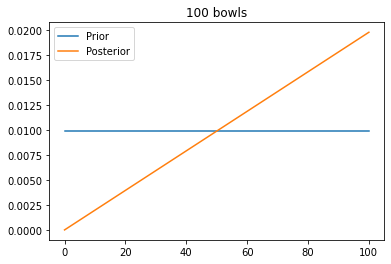

In [45]:
n = 101 #Quantidade de bowls

hypos = np.arange(n)
prior = Pmf(1, hypos) 
prior.normalize()
likelihood_vanilla = hypos/100
posterior = prior * likelihood_vanilla
posterior.normalize()
plot_graph(prior, posterior)

Prior é a chance de escolher o determinado pote, enquanto o posterior é a chance de tirar um biscoito de baunilha dele.

In [46]:
#Melhor porcentagem para o cénario
posterior.idxmax()

100

#### Segunda rodada
Agora vamos para o cenário de tirarmos o cookie de baunilha e depois devolvelo e tirarmos novamente um outro de baunilha? 

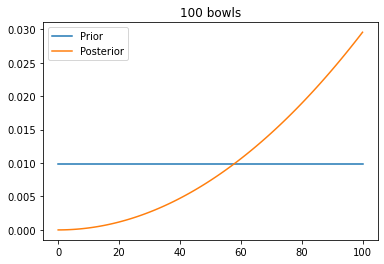

In [47]:
posterior = posterior * likelihood_vanilla
posterior.normalize()
plot_graph(prior, posterior)

In [48]:
#Melhor porcentagem para o cénario
posterior.idxmax()

100

Os potes que tem mais cookies ficam com acentuados enquanto os que tem menos cookies ficam menores.

#### Terceira rodada
Agora vamos fazer o mesmo que a segunda rodada mas com a possibilidade de ter um cookie de chocolate

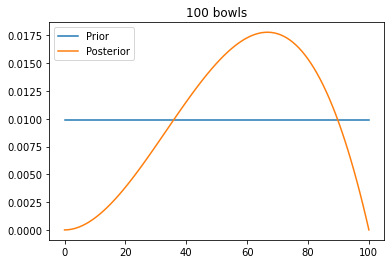

In [49]:
likelihood_chocolate = 1 - hypos/100
posterior = posterior * likelihood_chocolate
posterior.normalize()
plot_graph(prior, posterior)

Agora temos um efeito que os ultimos potes não tem tanto cookie de chocolate e por isso ficam desfavoraveis.

In [50]:
#Melhor porcentagem para o cénario
posterior.idxmax()

67

### Dice problem
Temos uma caixa com um d6, um d8 e um d12 <br>
Qual á a chance de a gente rodar 1 em um d6

In [51]:
hypos = [6, 8, 12]
prior = Pmf(1/3, hypos)

In [52]:
likelihood = [1/6, 1/8, 1/12]
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


In [53]:
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


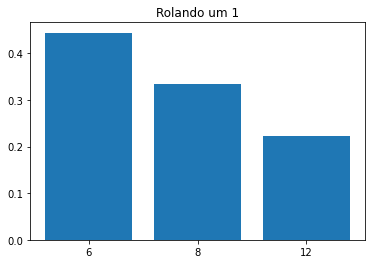

In [54]:
fig, ax = plt.subplots()
x = range(len(posterior))
ax.bar(x, posterior)

ax.set_xticks(x)
_ = ax.set_xticklabels(posterior.index)
plt.title('Rolando um 1')
plt.show()


In [55]:
#Chance de rolar 8
likelihood = 0, 1/8, 1/12
posterior = prior * likelihood
posterior.normalize() 
posterior

,probs
6,0.0
8,0.6
12,0.4


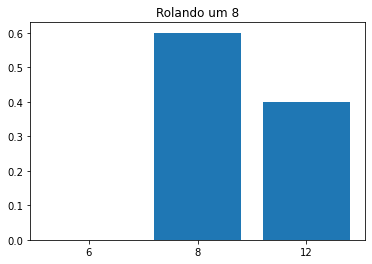

In [56]:
fig, ax = plt.subplots()
x = range(len(posterior))
ax.bar(x, posterior)

ax.set_xticks(x)
_ = ax.set_xticklabels(posterior.index)
plt.title('Rolando um 8')
plt.show()

In [57]:
def update_dice(pmf, data):
    """Update pmf based on new data."""
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

Mesmo caso anterior dos dados mas rodar ele 4 vezes e conseguir 1, 3, 5, 7. Qual a chance de ser um dado d8

In [106]:
hypos = [6, 8, 12]
prior = Pmf(1/3, hypos)
posterior = prior

In [100]:
#Chance de rolar 1, 3, 5
for i in range(3):
    likelihood = 1/6, 1/8, 1/12
    posterior *= likelihood
    posterior.normalize() 

likelihood = 0, 1/8, 1/12
posterior *= likelihood
posterior.normalize() 
posterior    

,probs
6,0.000000
8,0.835052
12,0.164948


Agora teremos uma quantidade de dados diferente. 1 d4, 2 d6,3 d8,4 d12,5 d20. Se tirar um  7, quan a chance de ser d8?

In [114]:
hypos = [4, 6, 8, 12, 20]
prob = [1/15, 2/15, 3/15, 4/15, 5/15]
prior = Pmf(prob, hypos)
prior

,probs
4,0.066667
6,0.133333
8,0.200000
12,0.266667
20,0.333333


In [117]:
likelihood = [0,0,1/8,1/12,1/20]
posterior = prior * likelihood
posterior.normalize() 
posterior    

,probs
4,0.000000
6,0.000000
8,0.391304
12,0.347826
20,0.260870


Tenho duas gavetas de meias. A primeira tem a mesma quantidade de meias brancas e pretas.<br> 
A segunda tem a messma quantidade de meias vermelhas, verdes e azuis.<br>
Você escolheu uma gaveta aleatoriamente

In [137]:
#qual a chance das meias serem brancas?

In [138]:
prior = Pmf.from_seq([1,2])
likelihood = [1/2, 0]
posterior = prior * likelihood
posterior

,probs
1,0.25
2,0.00


In [139]:
#Qual a chance da  meia ser vermelha?

In [140]:
prior = Pmf.from_seq([1,2])
likelihood = [0, 1/3]
posterior = prior * likelihood
posterior

,probs
1,0.000000
2,0.166667


In [145]:
#Qual a chance de ser qualquer meia
prior = Pmf.from_seq(['Branca','Preta', 'Vermelha', 'Verde', 'Azul'])
likelihood = [1/2,1/2,1/3,1/3,1/3]
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
Azul,0.250000
Branca,0.250000
Preta,0.166667
Verde,0.166667
Vermelha,0.166667


In [151]:
#Qualquer uma na gaveta 1
prior = Pmf.from_seq(['Branca','Preta', 'Vermelha', 'Verde', 'Azul'])
likelihood = [1/2,1/2,0,0,0]
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
Azul,0.5
Branca,0.5
Preta,0.0
Verde,0.0
Vermelha,0.0


In [149]:
#Qualquer uma na gaveta 2
prior = Pmf.from_seq(['Branca','Preta', 'Vermelha', 'Verde', 'Azul'])
likelihood = [0,0,1/3,1/3,1/3]
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
Azul,0.000000
Branca,0.000000
Preta,0.333333
Verde,0.333333
Vermelha,0.333333
